In [28]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
from pyfeti.src.utils import DomainCreator, create_selection_operator, dict2dfmap
import amfe



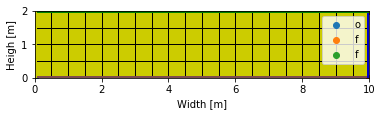

In [29]:
width,heigh=10.,2.
divX, divY = 21,5

creator_obj  = DomainCreator(width=width,heigh=heigh,x_divisions=divX,y_divisions=divY)
creator_obj.build_elements()

case_id = 1
curdir = os.getcwd()
script_folder = os.path.join(curdir,str(case_id))
mesh_folder = os.path.join(script_folder,'meshes')
mesh_path = os.path.join(mesh_folder,'mesh.msh')

try:
    creator_obj.save_gmsh_file(mesh_path)
except:
    os.makedirs(mesh_folder, exist_ok=True)
    creator_obj.save_gmsh_file(mesh_path)

#import mesh
m = amfe.Mesh()
m.import_msh(mesh_path)


ax = amfe.plot2Dmesh(m)
ax.set_xlim([0,width])
ax.set_ylim([0,heigh])
ax.set_aspect('equal')
ax.set_xlabel('Width [m]')
ax.set_ylabel('Heigh [m]')
plt.legend('off')

In [30]:
m.el_df

,idx_gmsh,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,5,6,7,8
0,1,point,4,6,6,1,1,None,0,NaN,NaN,NaN
1,2,point,4,7,7,1,1,None,20,NaN,NaN,NaN
2,3,point,4,8,8,1,1,None,84,NaN,NaN,NaN
3,4,point,4,9,9,1,1,None,104,NaN,NaN,NaN
4,5,straight_line,4,4,4,1,1,None,0,1.0,NaN,NaN
5,6,straight_line,4,4,4,1,1,None,1,2.0,NaN,NaN
6,7,straight_line,4,4,4,1,1,None,2,3.0,NaN,NaN
7,8,straight_line,4,4,4,1,1,None,3,4.0,NaN,NaN
8,9,straight_line,4,4,4,1,1,None,4,5.0,NaN,NaN
9,10,straight_line,4,4,4,1,1,None,5,6.0,NaN,NaN


In [31]:
# creating material
my_material = amfe.KirchhoffMaterial(E=210.0E9, nu=0.3, rho=7.86E9, plane_stress=True, thickness=1.0)

my_system = amfe.MechanicalSystem()
my_system.set_mesh_obj(m)
my_system.set_domain(3,my_material)

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 80 elements and 210 dofs.
Time taken for preallocation: 0.00 seconds.


In [32]:
K, _ = my_system.assembly_class.assemble_k_and_f()
M = my_system.assembly_class.assemble_m()

omega2, V = sparse.linalg.eigsh(K,k=10,M=M,which='SM')

In [37]:
freq = np.sqrt(np.abs(omega2))/(2.0*np.pi)

Text(0.5, 0, 'mode index')

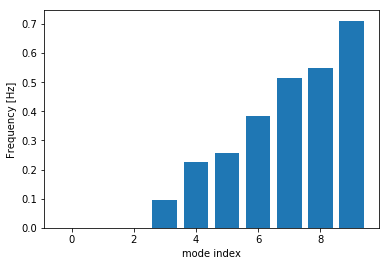

In [42]:
plt.bar(list(range(len(freq))),freq)
plt.ylabel('Frequency [Hz]')
plt.xlabel('mode index')

In [ ]:
amfe.plot

In [12]:
try:
    connectivity = []
    for _,item in m.el_df.iloc[:, m.node_idx:].iterrows():
        connectivity.append(list(item.dropna().astype(dtype='int64')))

    m.el_df['connectivity'] = connectivity
except:
    pass
    
id_matrix = my_system.assembly_class.id_matrix
id_map_df = dict2dfmap(id_matrix)
s = create_selection_operator(id_map_df,m.el_df)